This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** -amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [71]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [72]:
df = pd.read_csv("C:/Users/neave/Documents/unscript/data/AIML Dataset.csv")

In [73]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Checking Missing Values

In [74]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [75]:
# Counting the occurrences of fraud and no fraud
occ = df['isFraud'].value_counts()
occ

0    6354407
1       8213
Name: isFraud, dtype: int64

In [76]:
# Printing the ratio of fraud cases
fraud_ratio = occ/len(df.index)
fraud_ratio

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

From the above obseravation it seems the ratio of Fraud to Not Fraud is  very low which indicates Unbalanced Data.

In [77]:
# Count the occurrences of isflaggedfraud and no isflaggedfraud
occ_1= df['isFlaggedFraud'].value_counts()
occ_1 

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [78]:
fraud_ratio = occ_1/len(df.index)
fraud_ratio

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [79]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


It seems Same for the FlaggedFraud Cases

In [80]:
# count no of transactions per type
fraudby_type = df.groupby("type")["step"].count()
fraudby_type


type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: step, dtype: int64

## Visualizing Datasets

In [81]:
# checking the different types of steps involved in transactions
steps = df['step'].value_counts().nunique()
print("The no. of different steps involved in transactions are :", steps)

The no. of different steps involved in transactions are : 428


C:\Users\neave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


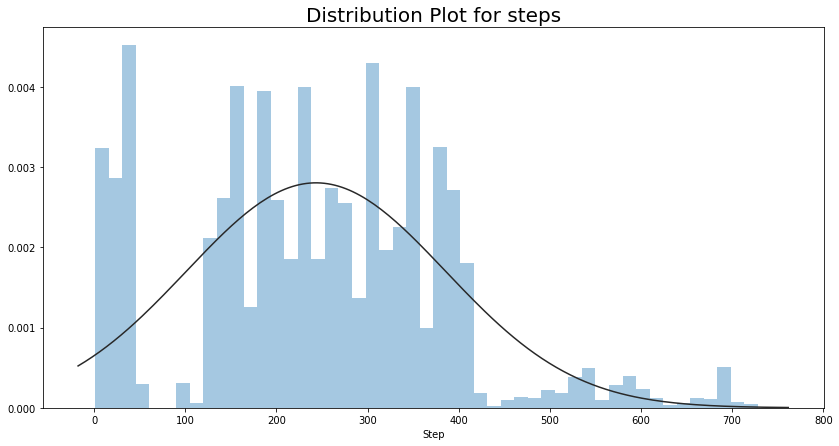

In [82]:
plt.rcParams['figure.figsize'] =(14, 7)
sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show();

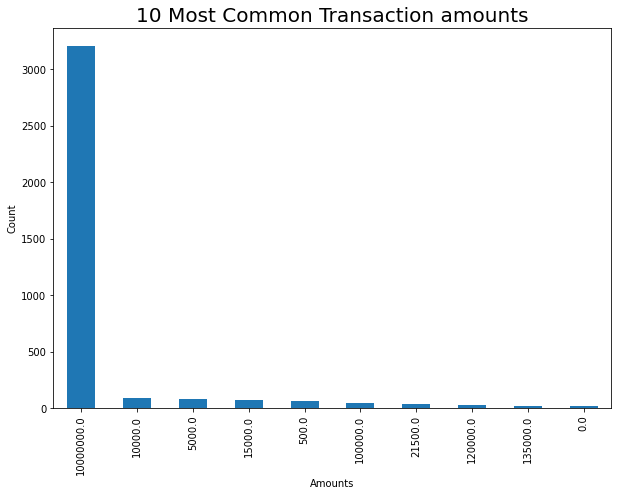

In [83]:
# Checking the different values of amounts transationed
plt.rcParams['figure.figsize'] = (10, 7)
df['amount'].value_counts().head(10).plot.bar()
plt.title('10 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('Count')
plt.show()

C:\Users\neave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


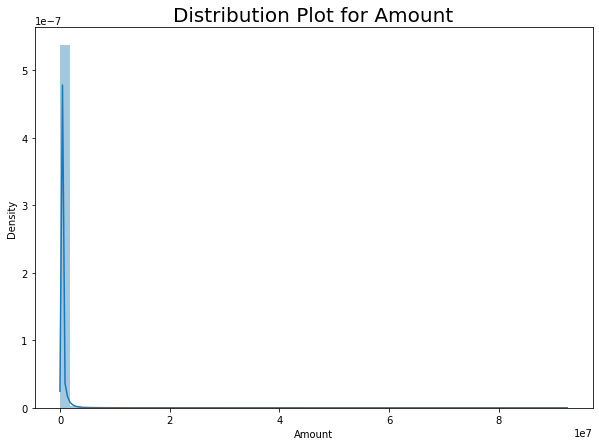

In [84]:
#Distribution Plot for Amount
ax = sns.distplot(df.amount)
ax.set_title(label = 'Distribution Plot for Amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [85]:
dfFraudPayment = df.loc[(df.isFraud == 1) & (df.type == 'PAYMENT')]
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
dfFraudCashin = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
dfFrauddebit = df.loc[(df.isFraud == 1) & (df.type == 'DEBIT')]
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))
print ('The number of fraudulent CASH_Ins = {}'.format(len(dfFraudCashin)))
print ('The number of fraudulent Debits = {}'.format(len(dfFrauddebit)))
print ('The number of fraudulent Payments = {}'.format(len(dfFraudPayment)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116
The number of fraudulent CASH_Ins = 0
The number of fraudulent Debits = 0
The number of fraudulent Payments = 0


From above observations it seem most of Fradulent tranctions was from TRANSFERS and CASH_OUT

In [86]:
# Finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [87]:
# Figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# Printing the minimum and maximum transactions done when FlaggedFraud is set
# The Transaction mode being Transfer
print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


#  Dataset where only Transfer Transactions are mentioned

In [88]:
# Defining a dataset containing only transfer type of transactions
dataTransfer = df.loc[df['type'] == 'TRANSFER']
dataTransfer = pd.DataFrame(dataTransfer)
dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [89]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)
# This table shows flagged frauds with minimum original old balance

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


In [90]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)
# This table shows flagged frauds with minimum original old balance

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


In [91]:
# Finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = df.loc[df.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())

Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [92]:
#Since fraud has occured for type TRANSFER AND CASHOUT
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [93]:
X.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [94]:
# Removing Unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)
X.shape

(2770409, 9)

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [95]:
#Adding New Features to Dataset
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.shape

(2770409, 11)

In [96]:
#One Hot Encoding For Categorical Variable Type
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [97]:
X.head(10)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [98]:
#Checiking the No of Fraud cases in New Datasets
X['isFraud'].value_counts()


0    2762196
1       8213
Name: isFraud, dtype: int64

In [99]:
# Prearing Datasets
Y = X['isFraud'] # Target Variable

X = X.drop(['isFraud'], axis = 1) # Removing target variable
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [100]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [101]:
Y.head()


2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

#Appling Oversampling technique SMOTE for Balanced Datasets


In [102]:
#from imblearn.over_sampling import SMOTE
#method = SMOTE()
#X_resampled, y_resampled = method.fit_resample(X, Y)
#
#print("Shape of X: ", X_resampled.shape)
#print("Shape of Y:", y_resampled.shape)

#X_resampled = X
#y_resampled = Y

In [103]:
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule
#method = RandomUnderSampler()
method = NeighbourhoodCleaningRule()
X_resampled, y_resampled = method.fit_resample(X, Y)

print("Shape of X: ", X_resampled.shape)
print("Shape of Y:", y_resampled.shape)


Shape of X:  (2765408, 10)
Shape of Y: (2765408,)


Prediction for validation set.

# Splitting the dataset into train and tests


In [104]:

from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42) #42 is the answer to life the universe and everything :)


In [105]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_validation: ", x_validation.shape)
print("Shape of y_validation: ", y_validation.shape)

Shape of x_train:  (1935785, 10)
Shape of y_train:  (1935785,)
Shape of x_validation:  (829623, 10)
Shape of y_validation:  (829623,)


In [106]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_validation = sc.transform(x_validation)

#Building XGBoost Model For Prediction

In [107]:
from xgboost import XGBRegressor, XGBClassifier
#model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=2)
model = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=2)


In [108]:
%%time
model.fit(x_train, y_train)

C:\Users\neave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 12.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
x_preds = model.predict(x_train)


use the y_train labels to check how well the model was trained

In [110]:
from sklearn.metrics import average_precision_score
auprc = average_precision_score(y_train, x_preds)
print("The Area under Precision Recall Curve Score For x_train is", auprc)

The Area under Precision Recall Curve Score For x_train is 0.996528557456651


In [111]:
y_preds = model.predict(x_validation)
auprc = average_precision_score(y_validation, y_preds)
print("The Area under Precision Recall Curve Score For y_train is", auprc)

The Area under Precision Recall Curve Score For y_train is 0.9943442657345263


In [112]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

In [123]:
import pickle
 
# Save the model as a pickle in a file
pickle.dump(model, open('XGBfraudModelv1.pkl', 'wb'))

# Visualising Tree


In [114]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30,30

In [115]:
#plot_tree(model, rankdir='LR', num_trees=19)


##Feature importance


In [116]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [117]:
importance_df.head(10)


,feature,importance
1,type,0.252710
5,oldbalanceDest,0.216716
4,newbalanceOrig,0.171248
2,amount,0.164073
6,newbalanceDest,0.067955
3,oldbalanceOrg,0.049867
8,errorBalanceOrig,0.032438
0,step,0.030058
9,errorBalanceDest,0.014935
7,isFlaggedFraud,0.000000


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

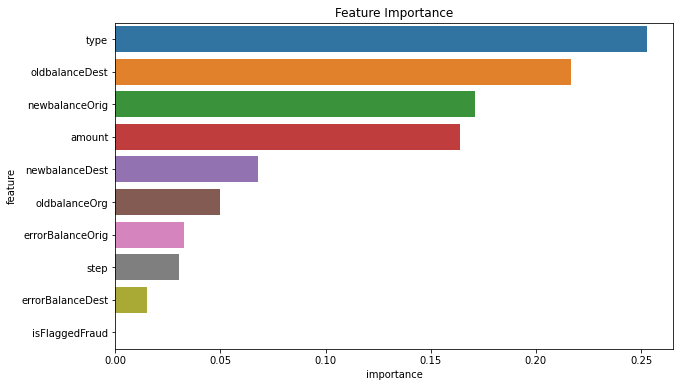

In [118]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

##From Observing 19th Tree and Feature importance Table, we can conclude the most imortant features is Error Balance origin.

In [119]:
#Comparing actual outcomes v/s predicted outcomes
from sklearn.metrics import accuracy_score,balanced_accuracy_score
y_pred = (y_preds > 0.5)

myaccuracy=accuracy_score(y_validation,y_pred)
print( myaccuracy)

0.9999831248651496


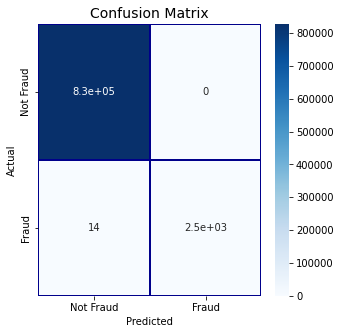

In [120]:
cm = pd.crosstab(y_validation.values, y_preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [121]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

print('Classification report:\n', classification_report(y_validation, y_preds))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    827155
           1       1.00      0.99      1.00      2468

    accuracy                           1.00    829623
   macro avg       1.00      1.00      1.00    829623
weighted avg       1.00      1.00      1.00    829623



Prediction for validation set.

## Comparing the Accuracy Score Ofabove two Models, We can conclude Accuray of XGBoost Model is Highest